# Support Vector Machine 

#### Support Vector Machine for Classification

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [24]:
dataset =pd.read_csv(r"C:\Users\Muhammad Uzair\Downloads\Datasets\placement.csv")
dataset.head(3)

,Unnamed: 0,cgpa,score,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0


In [25]:
dataset.drop('Unnamed: 0',axis =1,inplace=True)

In [26]:
dataset.isnull().sum()

cgpa         0
score        0
placement    0
dtype: int64

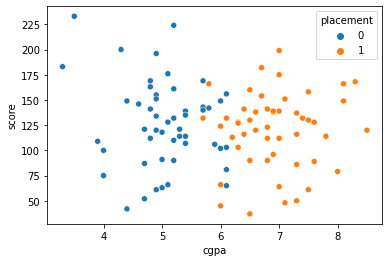

In [27]:
sns.scatterplot(x="cgpa",y ="score",data =dataset,hue ='placement')
plt.show()

In [28]:
x =dataset.iloc[:,:-1]
y =dataset['placement']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [30]:
from sklearn.svm import SVC
svc_model = SVC(kernel="linear")
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [31]:
print(f"Train Score: {svc_model.score(x_train, y_train) * 100:.2f}%")
print(f"Test Score: {svc_model.score(x_test, y_test) * 100:.2f}%")


Train Score: 91.25%
Test Score: 95.00%


In [ ]:
svc_model.predict([[5.9	,106]]) #=0

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [34]:
svc_model.predict([[7.1	,48]]) #=7.1	,48 =1	

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


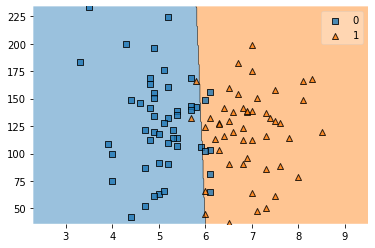

In [35]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),svc_model)
plt.show()

### Support Vector Machine (SVM-Regression)

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
dataset =pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Ice_cream selling data.csv')
dataset.head(3)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


In [103]:
dataset.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Select numerical columns for scaling
numerical_cols = dataset.select_dtypes(include=['float64']).columns
# Apply scaling
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
# Display the first few rows of the scaled dataset
dataset.head()  

,Temperature (°C),Ice Cream Sales (units)
0,-1.847945,2.136743
1,-1.718468,1.545101
2,-1.680051,1.934089
3,-1.581053,1.782250
4,-1.442062,1.349318


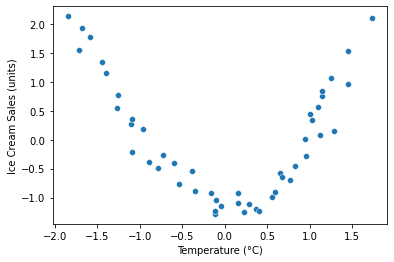

In [106]:
sns.scatterplot(x ='Temperature (°C)',y= 'Ice Cream Sales (units)',data=dataset)
plt.show()

In [107]:
x =dataset.iloc[:,:-1]
y =dataset['Ice Cream Sales (units)']

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [109]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)


SVR()

In [110]:
print(f"Train Score: {svr_model.score(x_train, y_train) * 100:.2f}%")
print(f"Test Score: {svr_model.score(x_test, y_test) * 100:.2f}%")

Train Score: 93.50%
Test Score: 93.11%


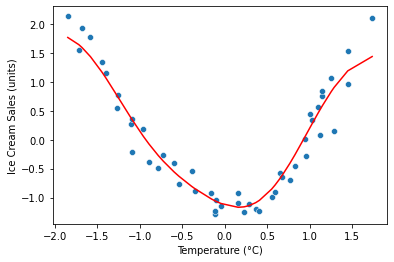

In [111]:
sns.scatterplot(x ='Temperature (°C)',y= 'Ice Cream Sales (units)',data=dataset)
plt.plot(dataset['Temperature (°C)'],svr_model.predict(x),color ='red')
plt.show()

In [112]:
svr_model.predict([[-1.095146]]) 

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([0.35654728])